# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 2 - Tests Estadísticos**
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

In [2]:
df_country = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df_country.head(2)

,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
0,Argentina,SouthAmerica,44271,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749,24.9,15.4,4.8
1,Australia,Oceania,24451,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?


El de tipo I es que rechazamos la hipótesis nula, cuando es verdadera y el de tipo II ocurre cuando la hipótesis nula es falsa y no la rechazamos. 

   
2. ¿Qué es la asimetría?
   


La asimetria ocurre cuando tenemos gráficos sesgados a la derecha o a la izquierda, lo que supone que los valores no siguen una distribuición normal. 

3. ¿Es vuestra variable respuesta asimétrica?
   


In [3]:
skew(df_country['restaurant_price_index'])

0.7736531033341337

In [4]:
df_country['restaurant_price_index'].skew()

0.7917625282758816

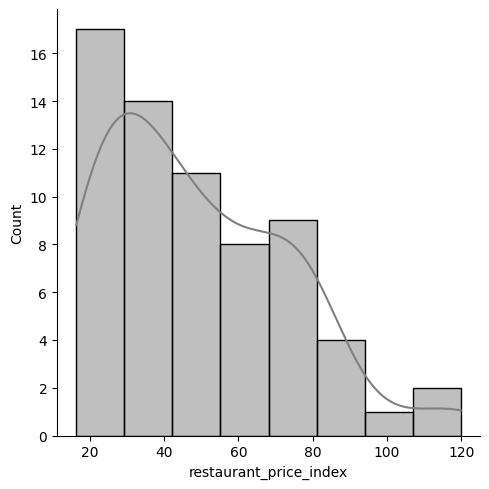

In [5]:
sns.displot(df_country['restaurant_price_index'], kde = True, color = "grey");

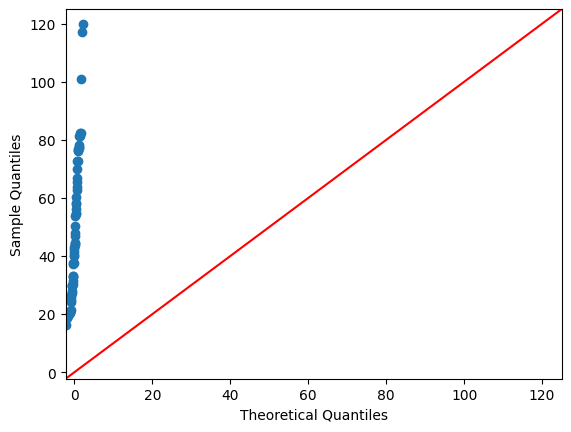

In [6]:
sm.qqplot(df_country['restaurant_price_index'], line ='45');

- La variable respuesta 'Restaurant Price Index' es asimétrica, distribución NO normal.

4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?
   


In [7]:
kurtosistest(df_country['restaurant_price_index'])

KurtosistestResult(statistic=0.4694704916932442, pvalue=0.6387333721800098)

El valor de la curtosis de la variable 'Restaurant Price Index' es pvalue = 0.6387333721800098, o sea, mayor que cero. Es este caso tenemos una leptocurtosis.

5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [8]:
stats.shapiro(df_country['restaurant_price_index'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270884139463305)

De acuerdo con lo que sugieren los datos, la variable respuesta 'Restaurant Price Index' elegida no presenta distribuición normal. El histograma de la variable se apresenta sesgado hacia la derecha y pvalue es menor que 0.05. 